## HW1_ETF爬蟲與資料視覺化

- 爬蟲工具 - `ETF_Scraper` [github](https://github.com/r05323045/NTU_Fintech_Text_Mining_2019/blob/master/hw1/README.md)
- 視覺化工具 - `Highchart` `Plotly`

In [1]:
from ETF_Scraper import etf_scraper
import pandas as pd
import numpy as np
import re
import json
from datetime import datetime
import pandas as pd
from highcharts import Highstock

In [18]:
df = pd.read_csv('Crude Oil ETF List (22).csv')

In [20]:
df1 = pd.read_csv('Gold ETF List (17).csv')

In [4]:
g7_lst = list(df1[df1.Inception < '2015-12-31'].Symbol) + list(df[df.Inception < '2015-12-31'].Symbol)

### 取得日資料

In [11]:
g7_data = []
ceased_lst = []
for i in g7_lst:
    temp = etf_scraper(i, '2015-12-31', '2018-12-31').data()
    if type(temp) == str:
        match = re.findall('[^ceased trading]', temp)
        ceased_lst.append(''.join(match))
    else:
        g7_data += list(temp.items())
g7_data = dict(g7_data)

In [12]:
df_daily = pd.DataFrame.from_dict(g7_data)
df_daily.head()

GLD       IAU       SGOL      OUNZ  UGLD       DGL  \
2015-12-31  101.62468  10.25350  103.63688  10.55280  73.7  34.68842   
2016-01-04  103.53428  10.44631  105.58364  10.75138  76.8  35.17354   
2016-01-05  103.03072  10.39557  105.07033  10.69910  77.5  35.27689   
2016-01-06  104.40770  10.53449  106.47404  10.84204  80.4  35.71712   
2016-01-07  105.83684  10.67873  107.93137  10.99044  83.9  36.23200   

                 UGL       DGP        GLL      DZZ    ...          UBG  \
2015-12-31  29.72784  18.18437  115.88215  8.86283    ...      27.2112   
2016-01-04  30.97124  18.69325  110.99619  8.61369    ...      27.6052   
2016-01-05  30.66964  18.80248  112.06532  8.56017    ...      27.6885   
2016-01-06  31.48834  19.26429  109.06371  8.33483    ...      28.0443   
2016-01-07  32.35415  19.80480  106.04912  8.07114    ...      28.4612   

                 USO       UCO      DBO       SCO       USL        DTO  \
2015-12-31  11.02426  25.15494  9.07178  66.60414  16.99604  159.60239   
2016-01-04  10.94041  24.86150  9.01904  67.36153  16.93183  162.00517   
2016-01-05  10.70519  23.85162  8.83578  70.09348  16.67783  168.80997   
2016-01-06  10.10993  21.31146  8.36507  77.56108  15.96445  185.89549   
2016-01-07   9.90211  20.45146  8.19613  80.68564  15.70612  191.87613   

                OLO     OLEM        SZO  
2015-12-31  4.61855  14.9187   92.82589  
2016-01-04  4.59164  14.8415   93.52171  
2016-01-05  4.49841  14.5744   95.49983  
2016-01-06  4.25880  13.8422  100.46768  
2016-01-07  4.17284  13.5865  102.20620  

[5 rows x 22 columns]

#### 已下市名單

In [50]:
print(', '.join(ceased_lst) + ' ceased trading')

UWTI, DWTI ceased trading


#### 存成`json`方便日後讀取

```python
with open('commodity_日資料.json', 'w') as json_data:
     json.dump(g7_daily, json_data)
```

### 從日資料擷取月資料

In [30]:
g7_month = []
for i in g7_data:
    temp = dict()
    temp[i] = dict()
    for j in range(2015, 2019):
        temp[i][str(j)] = dict()
    for j in g7_data[i]:
        for k in temp[i]:
            if j[:4] == k:
                temp[i][k][j[5:7]] = (j, g7_data[i][j])
    g7_month += list(temp.items())
g7_month = dict(g7_month)
g7_monthly = dict()
for i in g7_month:
    g7_monthly[i] = dict()
    for j in g7_month[i]:
        for k in g7_month[i][j]:
            g7_monthly[i][g7_month[i][j][k][0]] = g7_month[i][j][k][1]

In [37]:
df_g7_monthly = pd.DataFrame.from_dict(g7_monthly)
df_g7_monthly.head()

GLD       IAU       SGOL      OUNZ   UGLD       DGL  \
2015-12-31  101.62468  10.25350  103.63688  10.55280   73.7  34.68842   
2016-01-29  106.33297  10.72975  108.43758  11.04173   85.5  36.46182   
2016-02-29  118.06861  11.91535  120.40407  12.26052  113.7  40.31441   
2016-03-31  118.23013  11.93306  120.56891  12.27718  112.7  40.34314   
2016-04-29  122.84229  12.39997  125.27198  12.75600  127.5  42.13831   

                 UGL       DGP        GLL      DZZ    ...          UBG  \
2015-12-31  29.72784  18.18437  115.88215  8.86283    ...      27.2112   
2016-01-29  32.62749  20.05524  104.70276  7.94380    ...      28.6533   
2016-02-29  39.95436  24.29914   83.26491  6.25685    ...      31.7745   
2016-03-31  39.87364  24.33700   82.05939  6.24231    ...      31.8116   
2016-04-29  42.89825  26.51345   75.46205  5.67892    ...      33.2915   

                 USO       UCO      DBO       SCO       USL        DTO  \
2015-12-31  11.02426  25.15494  9.07178  66.60414  16.99604  159.60239   
2016-01-29   9.65541  18.92944  7.98585  78.49297  15.88698  198.88399   
2016-02-29   8.99130  15.75812  7.39671  79.39048  15.30218  218.71557   
2016-03-31   9.74454  17.98606  7.78552  64.88431  16.35091  183.04522   
2016-04-29  11.29380  23.58696  8.63426  45.92025  18.40176  124.94575   

                OLO     OLEM        SZO  
2015-12-31  4.61855  14.9187   92.82589  
2016-01-29  4.06646  13.6891  104.23029  
2016-02-29  3.76408  13.2762  109.40736  
2016-03-31  3.96143  14.3685  100.46481  
2016-04-29  4.39337  16.4343   84.50010  

[5 rows x 22 columns]

#### 存成`json`方便日後讀取

```python
with open('commodity_月資料.json', 'w') as json_data:
     json.dump(g7_monthly, json_data)
```

```python
with open('commodity_月資料.json', 'r') as json_data:
     g7_monthly = json.load(json_data)
df_g7_monthly = pd.DataFrame.from_dict(df_g7_monthly)
```

### 資料視覺化
- `Highchart`
- `Plotly`

單ㄧETF日資料呈現，包含`價格` `淨值` `成交量`

In [96]:
random_etf = np.random.choice(list(df_g7_monthly), 1)[0] #隨機演示一檔ETF
etf_scraper(random_etf, '2015-12-31', '2018-12-31').plot()

<img src="images/highchart_for_etf_scraper.png" />

#### 所有ETF月資料呈現 - 因太多ETF較雜亂，先隨機取N個ETF比較

In [7]:
number_of_compare = 3 #選一個數字

name_lst = list(np.random.choice(list(df_g7_monthly), number_of_compare))
print('隨機取' + str(number_of_compare) +'檔ETF比較:'+', '.join(name_lst))

隨機取3檔ETF比較:DTO, DGP, DBO


In [97]:
H = Highstock()

for name in name_lst:
    nav_high_data = [[datetime.strptime(i, "%Y-%m-%d"), df_g7_monthly[name][i]] for i in df_g7_monthly[name].index if not pd.isna(df_g7_monthly[name][i])]        
    H.add_data_set(nav_high_data, 'line', name, id = name, tooltip = {'valueDecimals': 4})

options = {
            'rangeSelector' : {'selected' : 4},
            'title' : {'text' : ' vs '.join(name_lst)},
            'tooltip': {
                'style': {'width': '200px'},
                'pointFormat': '<span style="color:{series.color}">{series.name}</span>: <b>{point.y}</b> ({point.change}%)<br/>',
                'valueDecimals': 2}
                       ,
             'yAxis': { 'labels': {'align': 'right', 'x': -3},
                        'title': {'text': '%'},
                        'lineWidth': 0.5}, 
             'plotOptions': {'series': {'compare': 'percent'}},
                    }

H.set_dict_options(options)

H  

<img src="images/randomly_pick_3_etf.png" />

#### 所有ETF比較，並用`Plotly`建立下拉式選單，可以選擇觀看單ㄧETF

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go 

In [98]:
data = []
button_lst = []
loc = 0
number_etf = len(list(df_g7_monthly))

#隨機出色，讓選單的線條顏色不同
#hex_value = list('0123456789ABCDEF')
#def randomcolour():
#    return '#' + ''.join(hex_value[np.random.randint(len(hex_value)-1, size=1)[0]] for i in range(6))


for name in list(df_g7_monthly):
    data.append(go.Scatter(x=[datetime.strptime(i, "%Y-%m-%d") for i in df_g7_monthly[name].index if not pd.isna(df_g7_monthly[name][i])],
                        y=[df_g7_monthly[name][i] for i in df_g7_monthly[name].index if not pd.isna(df_g7_monthly[name][i])],
                        name=name, 
                        showlegend=True,))
                        #line=dict(color = randomcolour())))
    #visible_lst = [False for i in range(number_etf)]
    #visible_lst[loc] = True
    #button_lst.append(dict(label = name, method = 'update', args = [{'visible': visible_lst},{'title': name}]))
    #loc += 1
    
Default = [True for i in range(number_etf)]
#less_20 = [False for i in range(number_etf)]
Gold = [False for i in range(number_etf)]
Gold_less_20 = [False for i in range(number_etf)]
Gold_less_50 = [False for i in range(number_etf)]
Gold_larger_50 = [False for i in range(number_etf)]
Oil = [True for i in range(number_etf)]
Oil_less_50 = [True for i in range(number_etf)]
Oil_larger_50 = [True for i in range(number_etf)]
for i in range(len(list(df_g7_monthly))):
    if list(df_g7_monthly)[i] in list(df1.Symbol):
        Gold[i] = True
        Gold_less_50[i] = True
        Gold_larger_50[i] = True
        Gold_less_20[i] = True
        Oil[i] = False
        Oil_less_50[i] = False
        Oil_larger_50[i] = False
for i in range(len(list(df_g7_monthly))):
    if max(df_g7_monthly[list(df_g7_monthly)[i]]) < 50 :
        Gold_larger_50[i] = False
        Oil_larger_50[i] = False
        if max(df_g7_monthly[list(df_g7_monthly)[i]]) > 20 :
            Gold_less_20[i] = False
        #else:
        #    less_20[i] = True
    else:
        Gold_less_50[i] = False
        Oil_less_50[i] = False
        Gold_less_20[i] = False
        
        
button_lst = [
              dict(label = 'Crude Oil', method = 'update', 
                   args = [{'visible': Oil}, {'title': 'Crude Oil'}]),
              #dict(label = 'nav < 20', method = 'update', 
              #     args = [{'visible': less_20}, {'title':'nav less than 50'}]),
              dict(label = 'Crude Oil - nav > 50', method = 'update', 
                   args = [{'visible': Oil_larger_50}, {'title':'Crude Oil - nav larger than 50'}]),
              dict(label = 'Crude Oil - nav < 50', method = 'update', 
                   args = [{'visible': Oil_less_50}, {'title':'Crude Oil - nav less than 50'}]),
              dict(label = 'Gold', method = 'update', 
                   args = [{'visible': Gold}, {'title': 'Gold'}]),
              dict(label = 'Gold - nav > 50', method = 'update', 
                   args = [{'visible': Gold_larger_50}, {'title':'Gold - nav larger than 50'}]),
              dict(label = 'Gold - nav < 50', method = 'update', 
                   args = [{'visible': Gold_less_50}, {'title':'Gold - nav less than 50'}]),
              dict(label = 'Gold nav < 20', method = 'update', 
                   args = [{'visible': Gold_less_20}, {'title':'Gold nav less than 20'}]),
              dict(label = 'Reset', method = 'update', 
                   args = [{'visible': Default}, {'title': 'Visualization of all Monthly Data'}])]

updatemenus = list([dict(active=-1, buttons = button_lst)]) #選單

                                
layout = dict(title='Visualization of all Monthly Data', showlegend=True,
              xaxis=dict(
                  rangeselector=dict(
                      buttons=list([
                        dict(count=1, label='1m', step='month', stepmode='backward'),
                        dict(count=6, label='6m', step='month', stepmode='backward'),
                        dict(count=1, label='YTD', step='year', stepmode='todate'),
                        dict(count=1, label='1y', step='year', stepmode='backward'),
                        dict(step='all')
                    ])
                ),
                rangeslider=dict(visible = True),
            type='date')
            ,updatemenus = updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')

<img src="images/plotly_for_all_etf.png" />

可使用選單中的`Reset`回到初始圖表

Note : 上圖可以直接到[Plotly網站]( https://plot.ly/~r05323045/6/visualization-of-all-monthly-data/#/)觀看

```python
with open('commodity_日資料.json', 'r') as json_data:
     g7_daily = json.load(json_data)
```

## Riskiness index

$$\text{According to the paper of Aumann and Serrano (2008), we can calculate risckiness index r by }E(e^{-\frac{g}{r}})=1,$$

$$\text{ where g means the return of asset, which means }  {\small g = \frac{p_{t}-p_{t-1}}{p_{t-1}}}\text{. Let G is a random variable with pdf } f_{G}(g),$$

$$\text{If G ~}N(\mu, \sigma^2)\text{, we can calculate index r by characteristic function of G}$$

$$E(e^{tg})=e^{ \mu t + {\large\frac{\sigma^2 t^2}{2}}}$$

$$\text{Substitute t by }{\small -\frac{1}{r} } \text{, we can get }e^{-\frac{\mu}{r} + \frac{1}{2}(\frac{\sigma}{r})^2}=1$$

$$\text{Then, we have }r=\frac{\sigma ^ 2}{2\mu}$$ 

$$\text{ Hence, if we can assume the distribution of g is normal, the calculation of index r will be more simple}$$

$\text{Let check the KDE of every ETF in our list.}\\
\text{At the same time, we need to check whether the mean return of the ETF is larger than 0}$

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [257]:
def daily_return_iter():
    global etf_now
    global return_iter_mean
    for i in g7_daily:
        return_df = pd.DataFrame.from_dict({i : g7_daily[i]})
        lst = [(return_df[i][j] - return_df[i][j-1])/ return_df[i][j-1] for j in range(1, len(return_df[i]))]
        return_iter = [0] + lst
        return_iter_mean = np.mean(return_iter)
        etf_now = i
        yield return_iter
return_iter = daily_return_iter()

The mean return of DGLD is -0.0006363184825837732


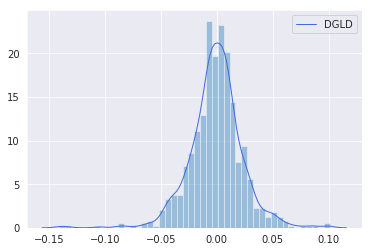

In [283]:
with sns.axes_style(style='darkgrid'):
    g = sns.distplot(next(return_iter) , kde_kws={"color": "royalblue", "lw": 1, "label" : etf_now})
print('The mean return of',etf_now,'is',return_iter_mean)

Seems like the distribution of every ETF return is normal.

### Other solution
Also, we can directly calculate index r by solve the equation. We have 3 years nav in monthly data, hence the equation is $$\sum_{i=1}^{37} e^{-\frac{{\Large g_{i}}}{r}} = 1$$
Challenge : Using linear programming to calculate index r

In [272]:
with open('commodity_月資料.json', 'r') as json_data:
     g7_monthly = json.load(json_data)

In [276]:
df_g7_monthly = pd.DataFrame.from_dict(g7_monthly)

In [285]:
def daily_return_iter_m():
    global etf_now_m
    global return_iter_mean_m
    for i in g7_daily:
        return_df = pd.DataFrame.from_dict({i : g7_monthly[i]})
        lst = [(return_df[i][j] - return_df[i][j-1])/ return_df[i][j-1] for j in range(1, len(return_df[i]))]
        return_iter = [0] + lst
        return_iter_mean_m = np.mean(return_iter)
        etf_now_m = i
        yield return_iter
return_iter_m = daily_return_iter_m()

In [297]:
return_lst = next(return_iter_m)
print('From monthly data, The mean return of',etf_now_m,'is',return_iter_mean_m)

From monthly data, The mean return of GLD is 0.005410185673681127
